<a href="https://colab.research.google.com/github/Sheeeeethal/Machine-Learning-Model-for-Blood-Donation-Likelihood/blob/main/Blood_donation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/raspiani/Give-Life-Predict-Blood-Donations/refs/heads/master/datasets/transfusion.data')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Import train_test_split method
from sklearn.model_selection import train_test_split


In [ ]:
data.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True)

#We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:

# 0 - the donor will not give blood
# 1 - the donor will give blood






In [ ]:
# Print target incidence as a proportion using normalize=True
data.target.value_counts(normalize=True).round(2)

,proportion
target,
0,0.76
1,0.24


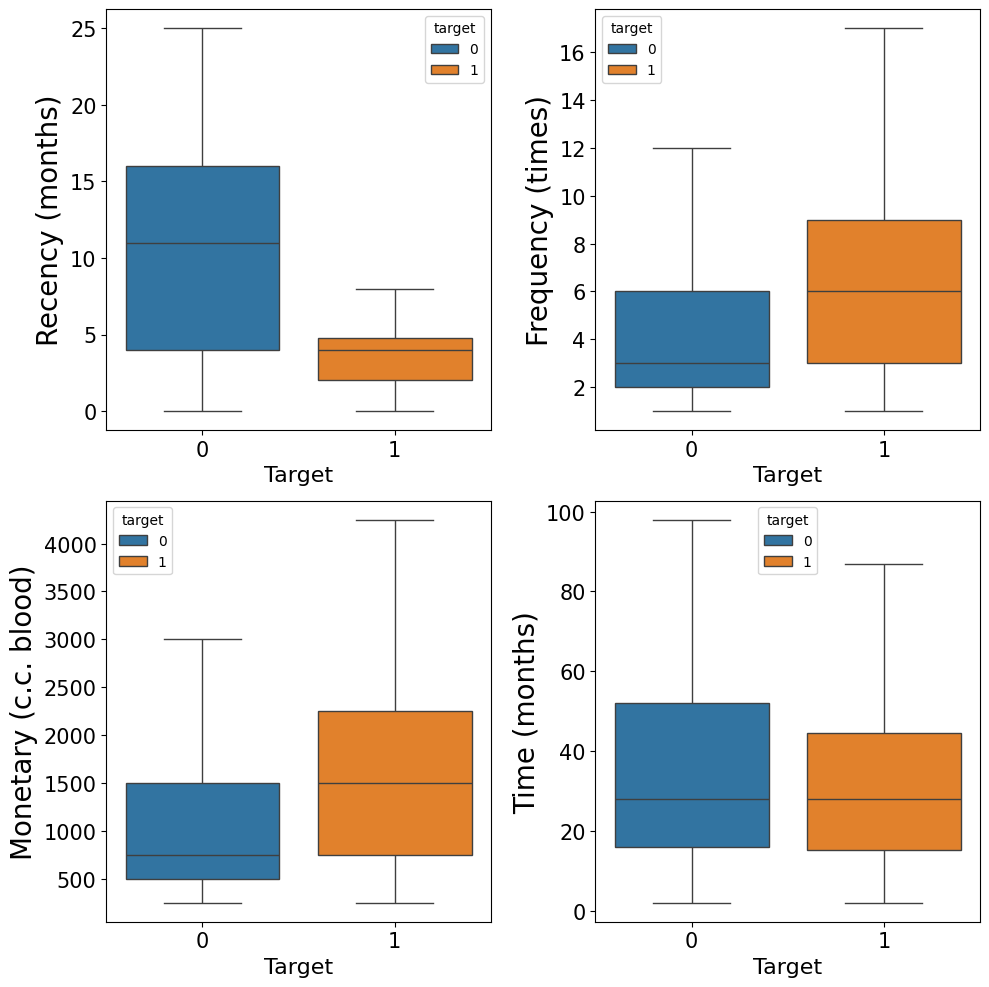

In [ ]:
# Define the variables to include in the boxplot
variables = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

# Create a boxplot for each variable comparing the 'target'
# Set the 'hue' parameter to 'target'
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    # Use showfliers=False to suppress outlier display instead of sym
    sns.boxplot(x='target', y=var, data=data, ax=axes[row, col], hue='target', showfliers=False)

    # Increase font size of x and y labels
    axes[row, col].set_xlabel("Target", fontsize=16)
    axes[row, col].set_ylabel(var, fontsize=20)

    # Increase font size of x and y axis titles
    axes[row, col].xaxis.set_tick_params(labelsize=15)
    axes[row, col].yaxis.set_tick_params(labelsize=15)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

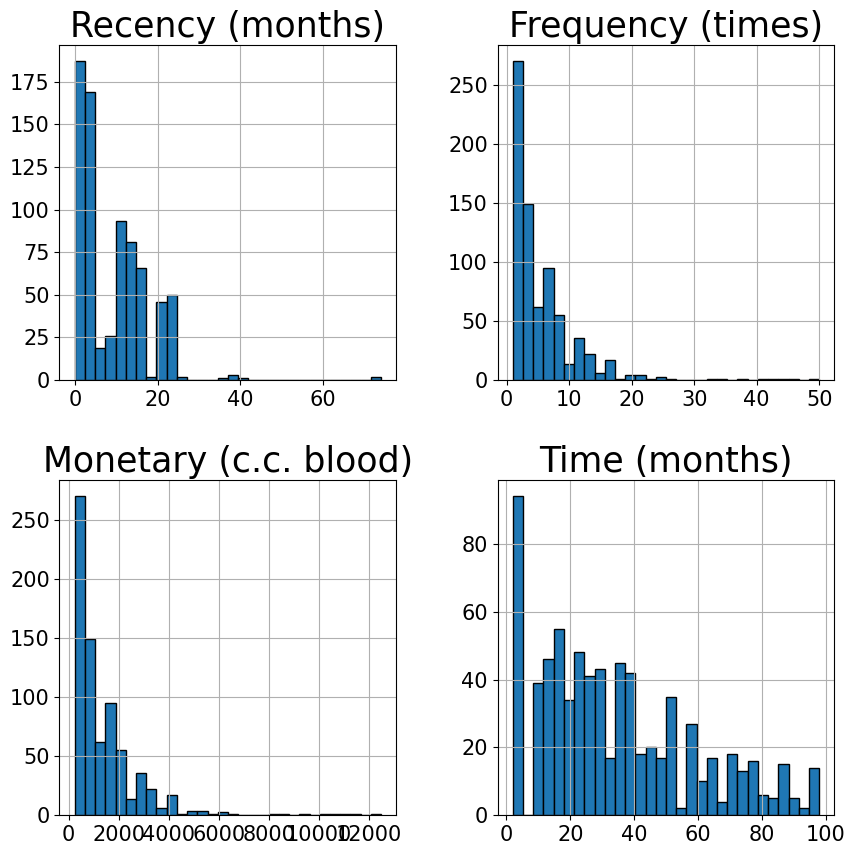

In [ ]:
# Visualize the distribution of variables

# Exclude 'target'
df_num = data.drop(columns=['target']).select_dtypes(include=['float64', 'int64'])

# Plot histograms for numeric variables
df_num.hist(figsize=(10, 10), bins=30, xlabelsize=15, ylabelsize=15, edgecolor='black')

# Loop through each subplot and set title font size
for ax in plt.gcf().get_axes():
    ax.set_title(ax.get_title(), fontsize=25)

In [ ]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split data into X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='target'),
    data.target,
    test_size=0.25,
    random_state=42,
    stratify=data.target)

# View X_train
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16
154,2,1,250,2


In [ ]:
y_train.head()

,target
334,0
99,1
116,1
661,0
154,0


In [ ]:
#checking the variance
# X_train's Variance
X_train.var().round(2)

,0
Recency (months),66.93
Frequency (times),33.83
Monetary (c.c. blood),2114363.70
Time (months),611.15


In [ ]:
#monetary column has more variance so normalizing it

X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

# Log Normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the Variance
X_train_normed.var().round(2)

,0
Recency (months),66.93
Frequency (times),33.83
Time (months),611.15
monetary_log,0.84


In [ ]:
#Training on Logistic Regression

# Importing Modules
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42)

# Train the Model
logreg.fit(X_train_normed, y_train)

# AUC Score
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7890


In [ ]:
recency = 1
frequency = 5
time = 5
monetary = 2000

# Apply log transform to match training data
monetary_log = np.log(monetary)

# Create the new donor's input as a DataFrame
new_donor = pd.DataFrame([{
    'Recency (months)': recency,
    'Frequency (times)': frequency,
    'Time (months)': time,
    'monetary_log': monetary_log
}])

In [ ]:
# Predict probability of re-donation
probability = logreg.predict_proba(new_donor)[:, 1][0]

# Predict class: 0 (won't re-donate), 1 (will re-donate)
prediction = logreg.predict(new_donor)[0]

# Print the results
print(f"Probability of re-donation: {probability:.2f}")
print("Prediction:", "Will re-donate" if prediction == 1 else "Will not re-donate")

Probability of re-donation: 0.58
Prediction: Will re-donate
